In [35]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

import os 
from pathlib import Path

import random

from PIL import Image

import matplotlib.pyplot as plt

import numpy as np

In [6]:
for dirpath,dirnames,filenames in os.walk("."):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 3 directories and 2 images in .
There are 0 directories and 3 images in ./task_2b_evaluator
There are 0 directories and 10 images in ./test
There are 5 directories and 0 images in ./training
There are 0 directories and 80 images in ./training/Humanitarian Aid and rehabilitation
There are 0 directories and 80 images in ./training/combat
There are 0 directories and 80 images in ./training/DestroyedBuildings
There are 0 directories and 80 images in ./training/Fire
There are 0 directories and 80 images in ./training/Military vehicles and weapons


In [16]:
train_dir = Path("./training")
test_dir = Path("./test")


Random image path:training/Fire/31.jpeg
Image width:306
Image height:165
Class :Fire


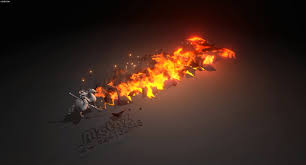

In [26]:
image_path_list = list(train_dir.glob("*/*.jpeg"))
random_image_path = random.choice(image_path_list)

image_class =random_image_path.parent.stem 

img = Image.open(random_image_path)
print(f"Random image path:{random_image_path}")
print(f"Image width:{img.width}")
print(f"Image height:{img.height}")
print(f"Class :{image_class}")
img

Text(0.5, 1.0, 'Image class:Fire Image shape:(165, 306, 3)')

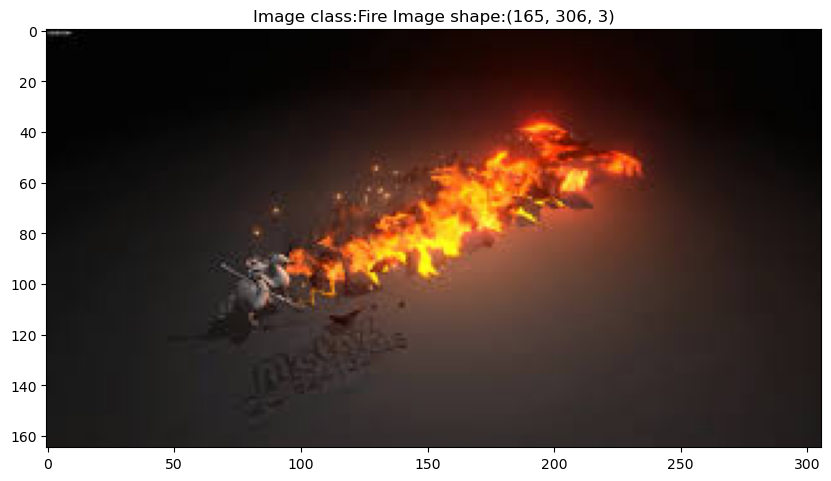

In [29]:
img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class:{image_class} Image shape:{img_as_array.shape}")

In [39]:
data_transform = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor()
])

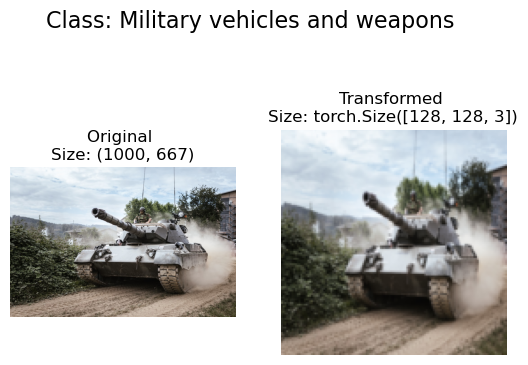

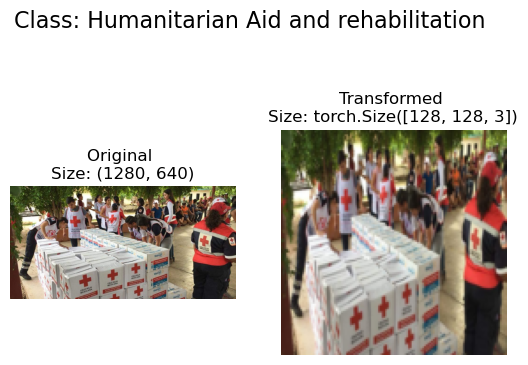

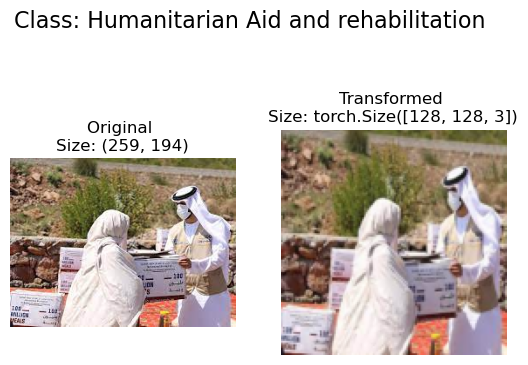

In [40]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [43]:
train_data = datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)
#test_data = datasets.ImageFolder(root=test_dir,transform=data_transform)

print(f"Train Data:{train_data}")

Train Data:Dataset ImageFolder
    Number of datapoints: 400
    Root location: training
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


In [45]:
train_data.classes 

['DestroyedBuildings',
 'Fire',
 'Humanitarian Aid and rehabilitation',
 'Military vehicles and weapons',
 'combat']

In [46]:
class_dict = train_data.class_to_idx
class_dict 

{'DestroyedBuildings': 0,
 'Fire': 1,
 'Humanitarian Aid and rehabilitation': 2,
 'Military vehicles and weapons': 3,
 'combat': 4}

Image shape:torch.Size([128, 128, 3])
Image label:0


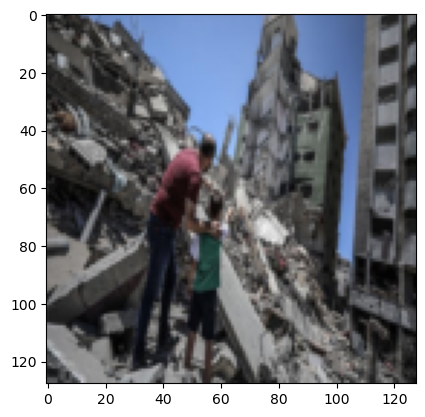

In [58]:
image,label = train_data[1][0],train_data[1][1]
image = image.permute(1, 2, 0)
print(f"Image shape:{image.shape}")
print(f"Image label:{label}")
plt.imshow(image)

In [59]:
from torch.utils.data import DataLoader 
train_dataloader = DataLoader(dataset=train_data,batch_size=1,shuffle=True)
train_dataloader

In [66]:
imag,label = next(iter(train_dataloader))

print(f"Image shape:{imag.shape}")
print(f"Label: {label}")

Image shape:torch.Size([1, 3, 128, 128])
Label: tensor([1])
